In [17]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout, execute_plot

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [19]:
random_runs = [
'kobybibas/pnml_for_active_learning/2owqsr4v',
'kobybibas/pnml_for_active_learning/3uv8qkzd',
'kobybibas/pnml_for_active_learning/1awg0e6d',
'kobybibas/pnml_for_active_learning/2uz3ccqp',
'kobybibas/pnml_for_active_learning/nk46a46y',
'kobybibas/pnml_for_active_learning/fix9x5qh'
]
bald_runs = [
'kobybibas/pnml_for_active_learning/2ppejidh',
'kobybibas/pnml_for_active_learning/1if8fe0k',
'kobybibas/pnml_for_active_learning/2g6lp2nc',
'kobybibas/pnml_for_active_learning/y8yn0f9e',
'kobybibas/pnml_for_active_learning/3j1dp6wz',
'kobybibas/pnml_for_active_learning/5t9zjpie'
]
pnml_runs = [
'kobybibas/pnml_for_active_learning/2x8fvajh',
'kobybibas/pnml_for_active_learning/1ba5a7bz',
'kobybibas/pnml_for_active_learning/kt71vbv1',
'kobybibas/pnml_for_active_learning/3fjgpje3',
'kobybibas/pnml_for_active_learning/14q5whwt',
'kobybibas/pnml_for_active_learning/3v9pq45l'
]

random_dfs = process_results(api=api,run_list=random_runs)
bald_dfs = process_results(api=api,run_list=bald_runs)
pnml_dfs = process_results(api=api,run_list=pnml_runs)

kobybibas/pnml_for_active_learning/2owqsr4v
kobybibas/pnml_for_active_learning/3uv8qkzd
kobybibas/pnml_for_active_learning/1awg0e6d
kobybibas/pnml_for_active_learning/2uz3ccqp
kobybibas/pnml_for_active_learning/nk46a46y
kobybibas/pnml_for_active_learning/fix9x5qh
kobybibas/pnml_for_active_learning/2ppejidh
kobybibas/pnml_for_active_learning/1if8fe0k
kobybibas/pnml_for_active_learning/2g6lp2nc
kobybibas/pnml_for_active_learning/y8yn0f9e
kobybibas/pnml_for_active_learning/3j1dp6wz
kobybibas/pnml_for_active_learning/5t9zjpie
kobybibas/pnml_for_active_learning/2x8fvajh
kobybibas/pnml_for_active_learning/1ba5a7bz
kobybibas/pnml_for_active_learning/kt71vbv1
kobybibas/pnml_for_active_learning/3fjgpje3
kobybibas/pnml_for_active_learning/14q5whwt
kobybibas/pnml_for_active_learning/3v9pq45l


In [20]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs,rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs,rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs,rolling_size=rolling_size)


TypeError: 'bool' object is not iterable

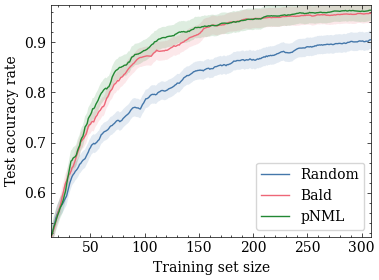

In [23]:

plt.style.use(["science", "bright",'no-latex'])
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 3))
fig,ax = execute_plot(random_res,bald_res,pnml_res,fig,ax)
ax.get_legend().remove()
print("MNIST OOD")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "mnist_ood.pdf"))
plt.show()